In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import sqlalchemy

Importing the data from SQLite tables. 3 tables - all jobs, jobs with salaries, jobs with salaries and keywords. The keywords/search terms used for the analysis includes: Data Analyst, Data Scientist, Business Intelligence, Database Administrator.

In [3]:
engine = sqlalchemy.create_engine('sqlite:///JobData.db')

jobs = pd.read_sql('Select * FROM Jobs', engine, index_col='id')

jobs_salaries = pd.read_sql(""" Select
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id""", 
engine, index_col='id')

jobs_salaries_keywords = pd.read_sql(""" Select 
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling, t3.keyword 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id LEFT JOIN KeywordRef t3 ON t3.id = t1.id""", 
engine, index_col=['id', 'keyword'])


Overall job data seems clean and effectively populated for the most part. Rating's are null if not provided from job which indicates rating is sparely populated on job board. Working with a dataset of over 3000 jobs. 

In [4]:
jobs.head()

,job_title,company,location,rating_provided,rating,salary_provided,weblink,date_recorded,location_model,jurisdiction,city,country
id,,,,,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=cdc658d9990a63fc,2023-11-17,Hybrid remote,ON,Toronto,Canada
cc8c9dc11f3c271f,"Business Analyst (Hybrid: North York, ON) - Re...",Enbridge Contingent Talent Community,"Hybrid remote in North York, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=cc8c9dc11f3c271f,2023-11-17,Hybrid remote,ON,North York,Canada
79507b61bd95323f,Pricing Analyst (FS/Tech/Furn),Staples Canada,"Mississauga, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=79507b61bd95323f,2023-11-17,Not Specified,ON,Mississauga,Canada
fb2e1282f0ec6e8e,Configuration Specialist/Functional Analyst,Procom,Remote in Ontario,n,NaN,n,https://ca.indeed.com/viewjob?jk=fb2e1282f0ec6e8e,2023-11-17,Remote,ON,Not Specified,Canada
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=1079d92e140e0d7f,2023-11-17,Remote,ON,Markham,Canada


In [5]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, cdc658d9990a63fc to eff3eeac0c6a2f1e
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        2920 non-null   object 
 1   company          2920 non-null   object 
 2   location         2920 non-null   object 
 3   rating_provided  2920 non-null   object 
 4   rating           84 non-null     float64
 5   salary_provided  2920 non-null   object 
 6   weblink          2920 non-null   object 
 7   date_recorded    2920 non-null   object 
 8   location_model   2920 non-null   object 
 9   jurisdiction     2920 non-null   object 
 10  city             2920 non-null   object 
 11  country          2920 non-null   object 
dtypes: float64(1), object(11)
memory usage: 296.6+ KB


Most jobs pulled do not have a salary provided - just under 70%. 

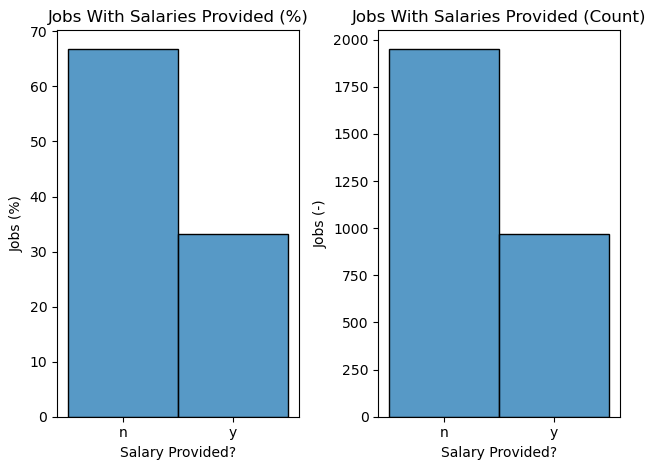

In [41]:
fig, axes = plt.subplots(1,2)

sns.histplot(data = jobs.sort_values(by = 'salary_provided'), x = 'salary_provided', stat = 'percent', ax=axes[0])
axes[0].set_title('Jobs With Salaries Provided (%)')
axes[0].set_xlabel("Salary Provided?")
axes[0].set_ylabel("Jobs (%)")

sns.histplot(data = jobs.sort_values(by = 'salary_provided'), x = 'salary_provided', ax=axes[1])
axes[1].set_title('Jobs With Salaries Provided (Count)')
axes[1].set_xlabel("Salary Provided?")
axes[1].set_ylabel("Jobs (-)")

plt.tight_layout()

plt.show()

The location model represents whether a job is remote, hybrid remote, or not specified. The not specified group is primarily on-site work but this is not factored out by the job board so it's grouped together. Over 60% of the jobs were part of the not specified group while the remaining amount was almost evenly split between hybrid and remote. The distribution is for a group of jobs that is typically very flexible in terms of location model. 

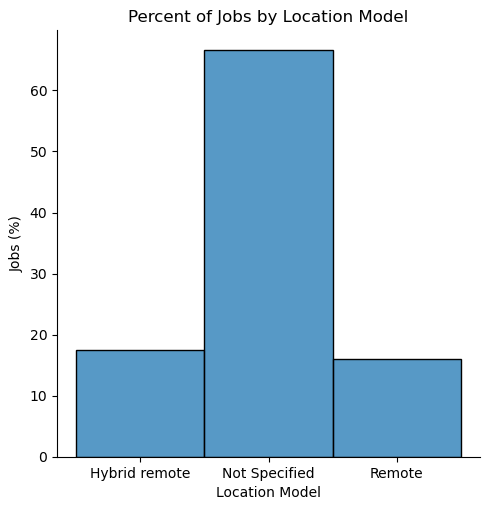

In [27]:
sns.displot(data = jobs, x = 'location_model', stat = 'percent')

plt.title("Percent of Jobs by Location Model")
plt.xlabel("Location Model")
plt.ylabel("Jobs (%)")

plt.show()

The next plot shows the distribution of jobs by province. It is effective at displaying where these subset of jobs tend to be located within the country on an absolute scale with Ontario having a very significant proportion of the results. British Columbia, Alberta, and Quebec round out the rest of the provinces with over 2% of the total jobs with the 4 provinces making up over 94% of the total jobs. 

The one thing this plot fails to show is how the jobs are distributed on a scale relative to population - Ontario has the highest population in Canada so from that perspective, it makes sense that it would have the most jobs as well. It would be interesting to see how well the provinces perform relative to their populations.

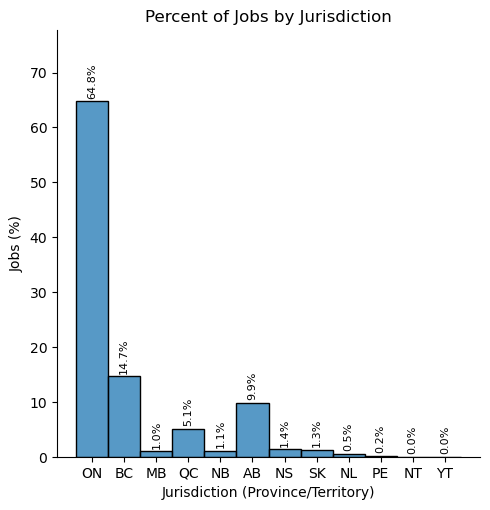

In [38]:
fg = sns.displot(data = jobs[jobs['jurisdiction'] != 'Not Specified'], x = 'jurisdiction', stat = 'percent')

for ax in fg.axes.ravel():
    for c in ax.containers:
        labels = [f'{v.get_height():0.1f}%' if v.get_height() > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)

plt.title("Percent of Jobs by Jurisdiction")
plt.xlabel("Jurisdiction (Province/Territory)")
plt.ylabel("Jobs (%)")

plt.show()


In [43]:
#Count up jobs grouped by province and add a percent of total column
jobs_jurisdiction_grouped = pd.DataFrame(jobs.groupby('jurisdiction').size(), columns = ['job_count'])
jobs_jurisdiction_grouped['job_count_perc'] = jobs_jurisdiction_grouped['job_count'] / jobs_jurisdiction_grouped['job_count'].sum() * 100

#Remove the jobs that do not specify the jurisdiction within them
jobs_jurisdiction_grouped = jobs_jurisdiction_grouped[jobs_jurisdiction_grouped.index != 'Not Specified'].sort_values(by='job_count', ascending=False)


In [44]:
#Pull in csv file with populations by province and add a percent of total column
pop = pd.read_csv('Canada_Province_Population.csv', thousands=',', index_col = 'geography')

pop['population_perc'] = pop['population']/pop['population'].sum()*100

In [45]:
#Merge the two tables to analyze together
population_merged = pd.merge(left = jobs_jurisdiction_grouped, right = pop, how = 'inner', left_on=jobs_jurisdiction_grouped.index, right_on='jurisdiction').set_index('jurisdiction')[['job_count_perc','population_perc']]

The job and population data by province merged shows some interesting patterns between the two. Of the four provinces that makeup around 94% of the total job count, British Columbia and Alberta are very close in relative terms whereas Ontario and Quebec are far apart. 

Quebec appears to have a significantly smaller number of jobs relative to its population. Now it's important to note that for Quebec, this difference is likely impacted by the language search difference. When searching for jobs on the job board, a language must be provided to conduct the seach in which is English in this case. Quebec is primarily a French speaking province so it would be reasonable to assume that the jobs posted for that location would primarily be in French too. This makes it difficult to identify whether the difference found here is due to Quebec providing less jobs relatively or whether less jobs were searched for due to the highly impactful language of search. 

Although Ontario has the largest population proportionally at almost 39%, it has almost 60% of the proportional job count which indicates it is providing many more jobs on a relative scale. 

It is interesting to note that out of the remaining provinces and territories, very single one has a smaller job count relative to population. They appear much closer because the numbers are all small but the proportional differences between them are still significant.

From a purely quantitative perspective, Ontario likely provides the best opportunity to find a job within this subset of search terms. BC and Alberta are close with Quebec being difficult to interpret and the remaining provinces providing significantly less jobs relatively. 

In [46]:
population_merged

,job_count_perc,population_perc
jurisdiction,,
ON,59.828767,38.989374
BC,13.561644,13.770905
AB,9.109589,11.735989
QC,4.691781,22.079680
NS,1.267123,2.631281
SK,1.198630,3.007708
NB,1.027397,2.079345
MB,0.924658,3.615835
NL,0.479452,1.333431


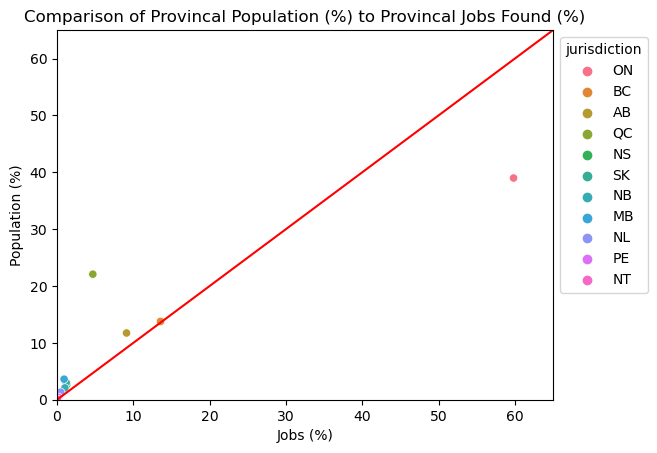

In [60]:
sns.scatterplot(data = population_merged, x='job_count_perc', y='population_perc', hue = population_merged.index)

axis_lim = 65

plt.xlim(0,axis_lim)
plt.ylim(0,axis_lim)

plt.plot([0,axis_lim], [0,axis_lim], color = 'red')

plt.legend(title='jurisdiction', bbox_to_anchor=(1, 1), loc='upper left')

plt.title(label="Comparison of Provincal Population (%) to Provincal Jobs Found (%)")
plt.xlabel("Jobs (%)")
plt.ylabel("Population (%)")

plt.show()


So Ontario provides the most jobs in quantity, but is there a difference between the provinces related to the features of the jobs provided? 

Looking into salary transparency, Ontario appears to be very lacking by providing salaries for only around 28% of its jobs. This is much lower than both the other heavy hitters in BC and Alberta (Quebec will have discrepancies as highlighted in the previous section). It was interesting to note that BC provided salaries for around 60% of their jobs while every other region struggled to even approach the 50% barrier. What may be the reason for such an outlier? Either companies are being pressured to post the salaries from market pressures or from the government through legislation. 

Investigating legislation, CTV news has an article on provincal laws related to salary transparency by province and the associated legislation. BC has legislation that mandates salary ranges be provided for job postings, although there is no penalty for not abiding. Ontario and Manitoba have some proposed or unadopted legislations related to this but they are not currently active. NL and PEI both require salary ranges be provided in their jobs. The rest of the provinces have no related legislation.[1] Based on this, it appears that there is legislative pressure on BC to provide salaries which may be having an impact even with no penalties involved. However, it is likely not the only factor as NL and PEI had jobs with no salaries posted althought the sample size there was much lower. 

[1] https://www.ctvnews.ca/business/how-pay-transparency-laws-are-coming-into-effect-across-canada-1.6649868

In [62]:
jobs_jurisdiction_salary_grouped =pd.DataFrame(jobs[jobs['jurisdiction']!='Not Specified'].groupby(by=['jurisdiction', 'salary_provided']).size(), columns=['job_count']).reset_index().sort_values('job_count', ascending=False).reset_index(drop=True)

jobs_jurisdiction_salary_grouped.head()

,jurisdiction,salary_provided,job_count
0,ON,n,1258
1,ON,y,489
2,BC,y,238
3,AB,n,164
4,BC,n,158


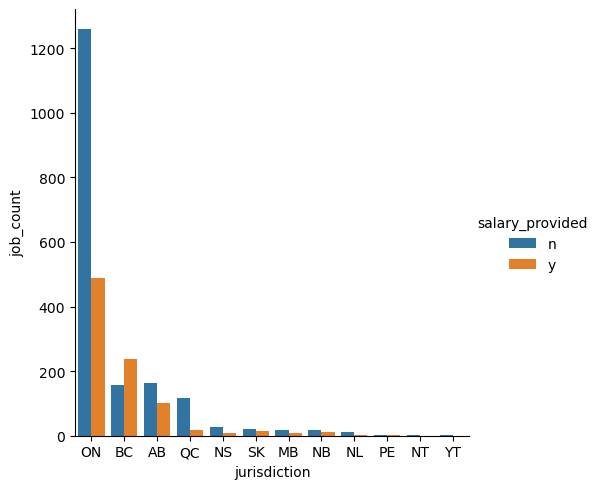

In [61]:
sns.catplot(data=jobs_jurisdiction_salary_grouped, kind = 'bar', 
            x = 'jurisdiction', 
            y = 'job_count',
            hue = 'salary_provided'
            )

plt.show()

In [23]:
jobs_salaries = pd.read_sql(""" Select
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id""", 
engine, index_col='id')

In [24]:
jobs_salaries.head()

,job_title,company,location,salary_type,salary_period,expected,floor,ceiling
id,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",range,hourly,61.00,60.00,62.00
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",range,yearly,75000.00,70000.00,80000.00
fbaa0c742c9095f4,Senior Data Analyst,Basis Technologies,"Remote in Toronto, ON",range,yearly,114000.00,84000.00,144000.00
edb18d98d48fef48,Data Analyst,ATW International Inc.,"York, ON",range,yearly,69826.00,40740.00,98912.00
6e63fd5ee73b1053,Data Developer and Analyst,Loyalist College,"Remote in Belleville, ON",range,hourly,44.39,41.12,47.67


In [25]:
jobs_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, cdc658d9990a63fc to 156755c3658cab6d
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      968 non-null    object 
 1   company        968 non-null    object 
 2   location       968 non-null    object 
 3   salary_type    968 non-null    object 
 4   salary_period  968 non-null    object 
 5   expected       899 non-null    float64
 6   floor          672 non-null    float64
 7   ceiling        631 non-null    float64
dtypes: float64(3), object(5)
memory usage: 68.1+ KB


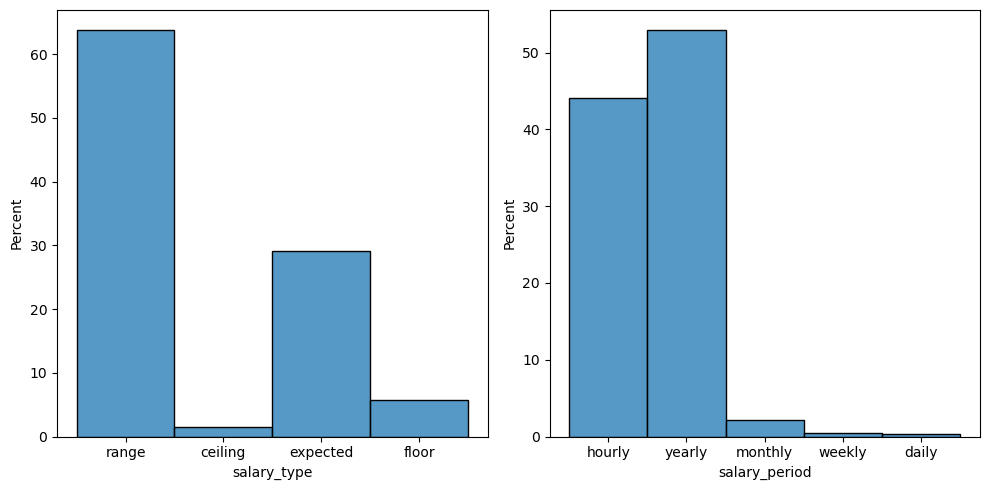

In [26]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

sns.histplot(data = jobs_salaries, x = 'salary_type', stat = 'percent', ax = axes[0])

sns.histplot(data = jobs_salaries, x = 'salary_period', stat = 'percent', ax = axes[1])

plt.tight_layout()

The left plot shows that most of the jobs have a 'range' or an 'expected' salary type. Range, as the name suggests represents situations in which a salary range is provided in the job posting (ie. $30,000 - $40,000). The expected represents situations in which only a single salary value is provided. Floor and ceiling depict situations where job postings provide a single salary value, but also indicate that the value given represents the minimum salary value for the role (ie. "From $30,000) or the maximum salary value for the role (ie. "Up to $40,000). 

It is important to account for these situational differences in values provided to ensure comparisons are done on equal terms. In this analysis, an assumption is made that the range salary provided can be linerally interpolated between it's minimum and maximum values to provide a relatively accurate expected salary value. 

There are other assumptions that can be made related to the floor and ceiling salary values to try and approximate an expected value. However, such methods would would introduce additional approximation errors. Due to this and the fact that the ceiling and floor salary types represent a relatively small part of the total dataset (<10%), further analysis that compare different salaries will focus on the range and expected salary types only. 



The right plot shows that the majority of jobs with salaries provided do so at an hourly or yearly period. Similarily, since the monthly, weekly and daily periods are very rare (<5%), the remaining analysis focuses on the heavy hitters instead.  

In [27]:
jobs_salaries_keywords

job_title  \
id               keyword                                                                     
cdc658d9990a63fc data analyst            Data Analyst (Banking Projects) - up to $62.00...   
1079d92e140e0d7f data analyst                                  Data Visualization Engineer   
fbaa0c742c9095f4 business intelligence                                 Senior Data Analyst   
                 data analyst                                          Senior Data Analyst   
                 data scientist                                        Senior Data Analyst   
...                                                                                    ...   
d546fc6f846b826c data analyst                                                 Data Analyst   
f297e51de393c29c data analyst                                             RESEARCH ANALYST   
98b5980af93502cf data analyst                                         Supply Chain Analyst   
7d96c8b6d4946e94 business intelligence                             Human Resources Manager   
156755c3658cab6d database administrator   Front Desk Administrator Remote Sites (82912001)   

                                                          company  \
id               keyword                                            
cdc658d9990a63fc data analyst                         CorGTA Inc.   
1079d92e140e0d7f data analyst                  Motorola Solutions   
fbaa0c742c9095f4 business intelligence         Basis Technologies   
                 data analyst                  Basis Technologies   
                 data scientist                Basis Technologies   
...                                                           ...   
d546fc6f846b826c data analyst                              Procom   
f297e51de393c29c data analyst            Burkett Asset Management   
98b5980af93502cf data analyst                              dbrand   
7d96c8b6d4946e94 business intelligence     Para Space Landscaping   
156755c3658cab6d database administrator         Sodexo Canada Ltd   

                                                             location  \
id               keyword                                                
cdc658d9990a63fc data analyst            Hybrid remote in Toronto, ON   
1079d92e140e0d7f data analyst                   Remote in Markham, ON   
fbaa0c742c9095f4 business intelligence          Remote in Toronto, ON   
                 data analyst                   Remote in Toronto, ON   
                 data scientist                 Remote in Toronto, ON   
...                                                               ...   
d546fc6f846b826c data analyst                           Vancouver, BC   
f297e51de393c29c data analyst                            Victoria, BC   
98b5980af93502cf data analyst                         Mississauga, ON   
7d96c8b6d4946e94 business intelligence                    Burnaby, BC   
156755c3658cab6d database administrator        Remote in Edmonton, AB   

                                        salary_type salary_period   expected  \
id               keyword                                                       
cdc658d9990a63fc data analyst                 range        hourly      61.00   
1079d92e140e0d7f data analyst                 range        yearly   75000.00   
fbaa0c742c9095f4 business intelligence        range        yearly  114000.00   
                 data analyst                 range        yearly  114000.00   
                 data scientist               range        yearly  114000.00   
...                                             ...           ...        ...   
d546fc6f846b826c data analyst                 range        hourly      26.00   
f297e51de393c29c data analyst                 range        yearly   72500.00   
98b5980af93502cf data analyst                 range        yearly   80000.00   
7d96c8b6d4946e94 business intelligence        range        yearly  100000.00   
156755c3658cab6d database administrator    expecte

In [28]:
jobs_salaries_keywords_hourly = jobs_salaries_keywords[jobs_salaries_keywords['salary_period'] == 'hourly']
jobs_salaries_keywords_yearly = jobs_salaries_keywords[jobs_salaries_keywords['salary_period'] == 'yearly']

<Axes: xlabel='expected', ylabel='Count'>

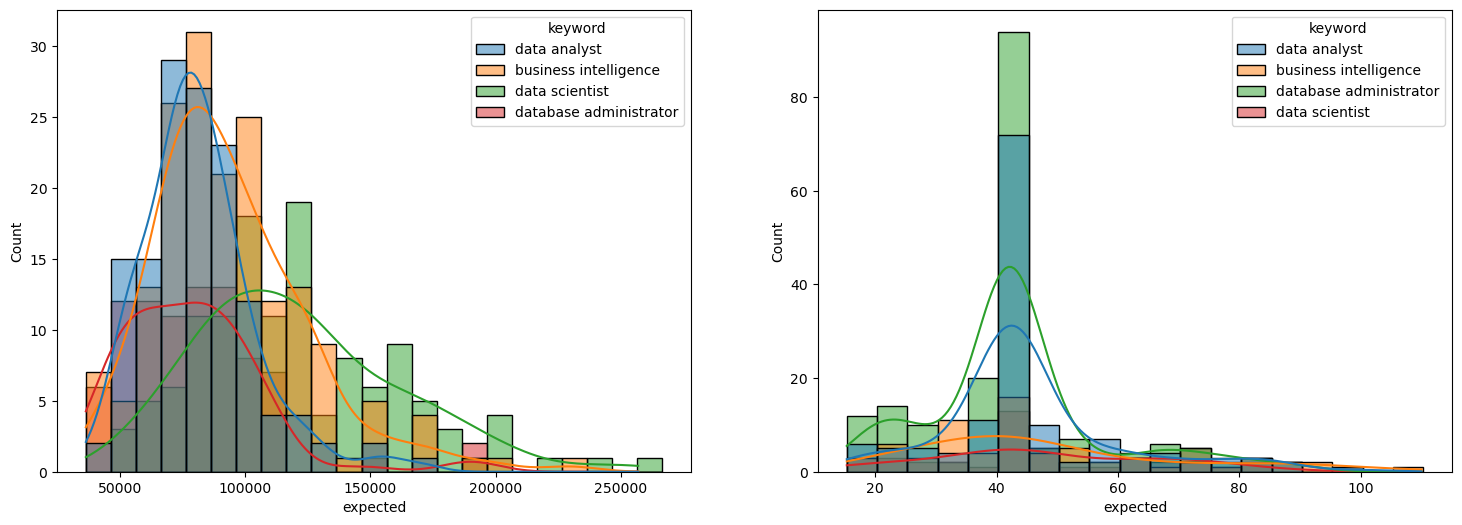

In [29]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(
    data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'], x='expected', hue = 'keyword', kde = True, binwidth = 10000, ax=axes[0])

sns.histplot(
    data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='hourly'], x='expected', hue = 'keyword', kde = True, binwidth = 5, ax=axes[1])

<Axes: xlabel='keyword', ylabel='expected'>

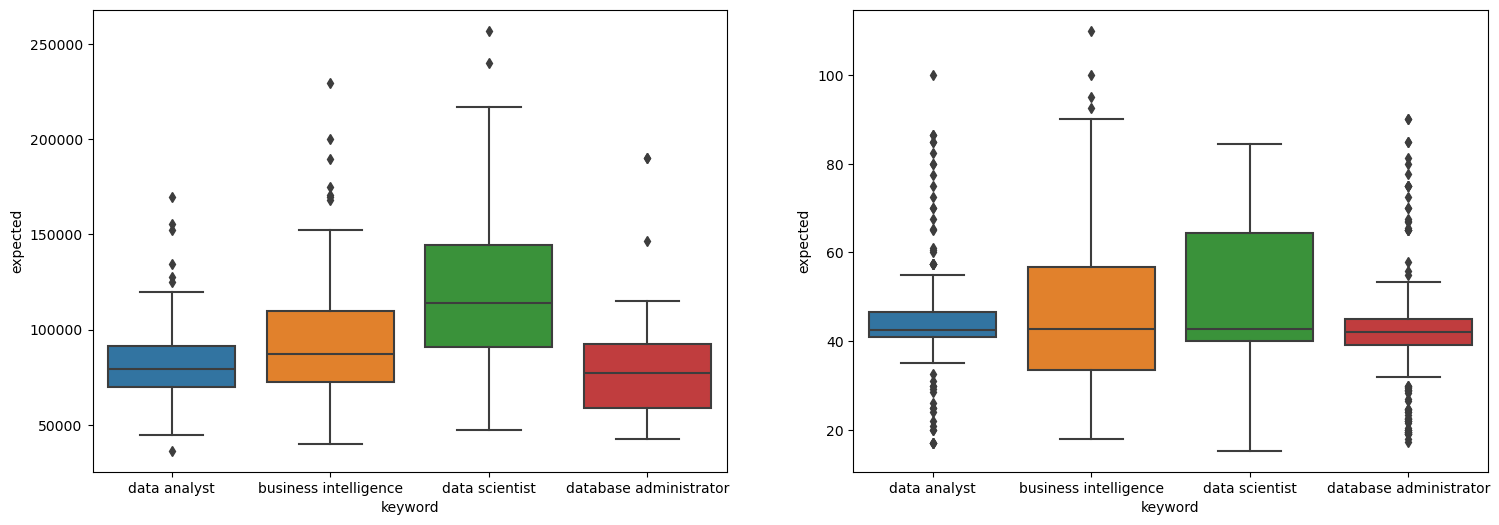

In [30]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

x_order = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'].reset_index()['keyword'].unique()

sns.boxplot(data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'].reset_index(), x='keyword', y='expected', ax=axes[0], order=x_order)

sns.boxplot(data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='hourly'].reset_index(), x='keyword', y='expected', ax=axes[1], order=x_order)